In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
from analyze_feature import analyze_feature

In [7]:
# Setting the style for the plots
sns.set_style("white", {'axes.grid' : False})

In [8]:
# Directory where the plots and PDF file will be saved
save_dir_path = 'output'

In [9]:
# Creating a random DataFrame

num_rows = 50

df = pd.DataFrame({
    'patient_id': np.random.randint(0, 9999, size=num_rows).astype(str),
    'feature_1': np.random.randint(0, 1001, size=num_rows),
    'feature_2': np.random.randint(0, 1001, size=num_rows),
    'response': np.random.randint(0, 2, size=num_rows),
    'os_months': np.random.uniform(0, 100, size=num_rows),
    'os_event': np.random.randint(0, 2, size=num_rows),
    'pfs_months': np.random.uniform(0, 100, size=num_rows),
    'pfs_event': np.random.randint(0, 2, size=num_rows)
})

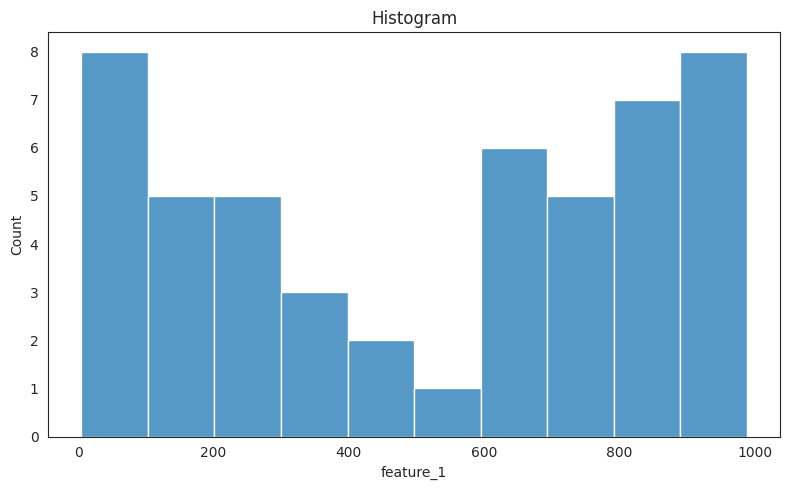

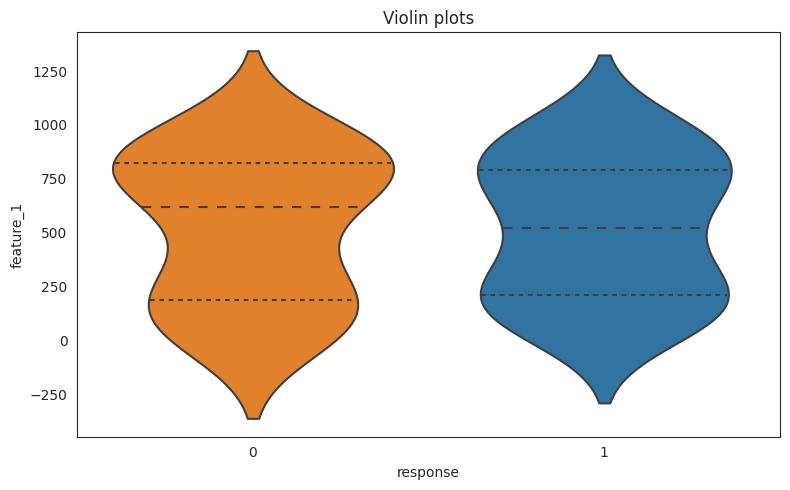

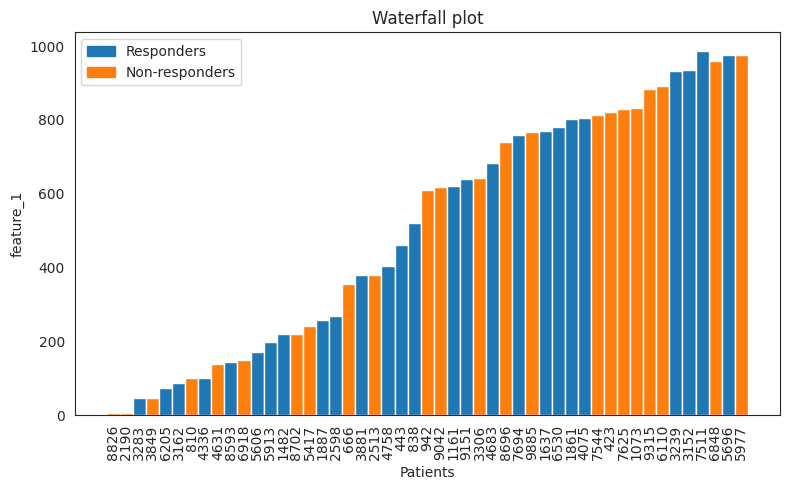

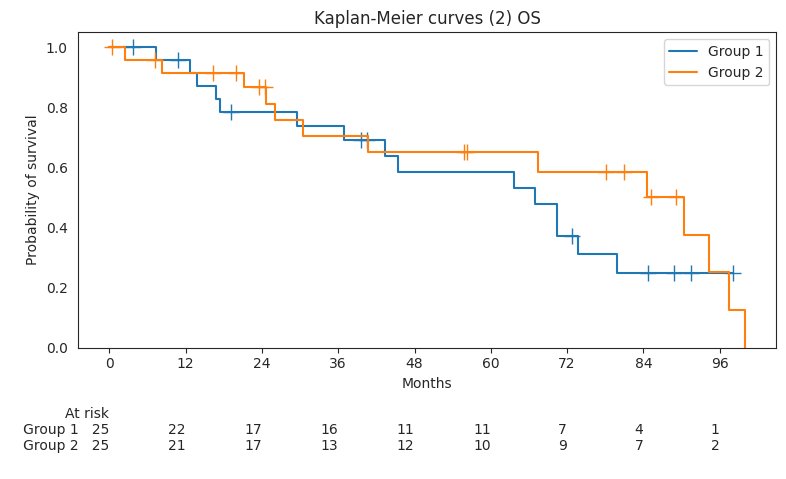

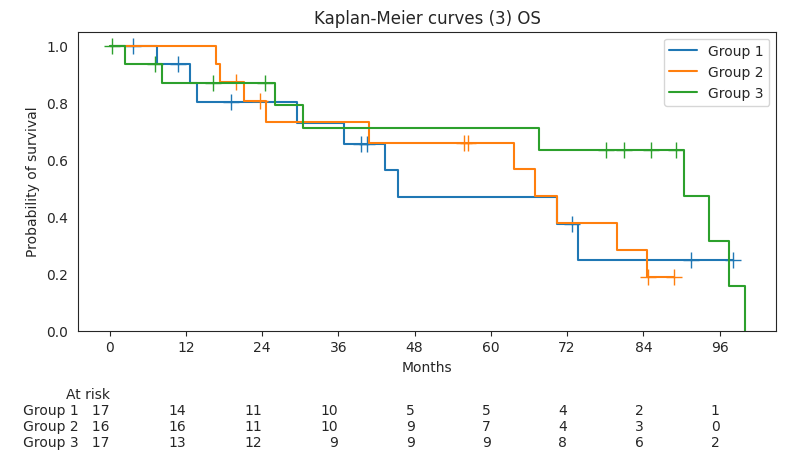

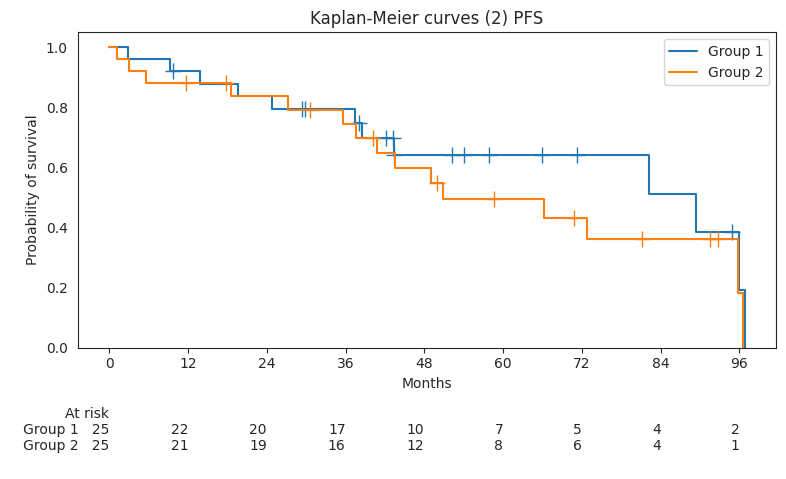

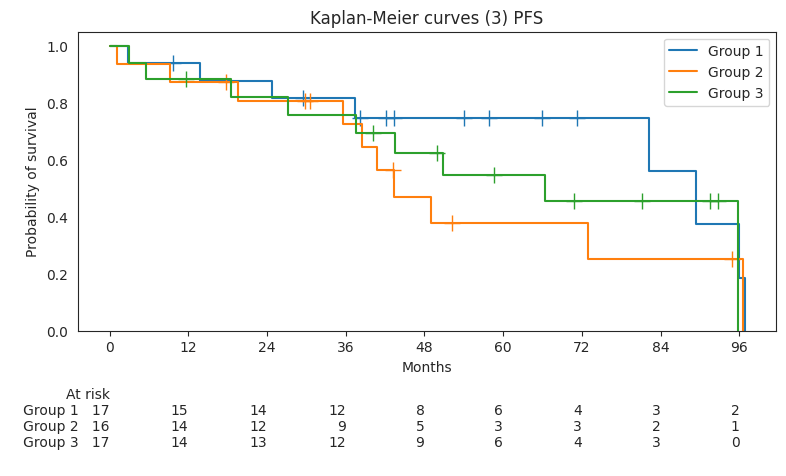

{'Mann-Whitney p-value': 0.9922344294149867, 'Logrank OS p-value': 0.3797026094380954, 'Logrank PFS p-value': 0.4097572380528447, 'Cox OS p-value': 0.33235122699324954, 'Cox OS HR': 0.9994358134569024, 'Cox OS assumption p-value': 0.9305818477899648, 'Cox PFS p-value': 0.43181713497451557, 'Cox PFS HR': 1.0004732915907726, 'Cox PFS assumption p-value': 0.6510901503745677, 'Cox OS dichotomized p-value': 0.381925957112061, 'Cox OS dichotomized HR': 0.7098264613985426, 'Cox OS dichotomized assumption p-value': 0.9384317475290621, 'Cox PFS dichotomized p-value': 0.41184194308763145, 'Cox PFS dichotomized HR': 1.3867105601145544, 'Cox PFS dichotomized assumption p-value': 0.7226691313959561, 'Logistic regression LOOCV AUC': 0.014492753623188408}

 PDF saved in output/feature_1.pdf


In [10]:
analyze_feature(df, 'feature_1', save_dir_path)